In [ ]:
# !pip install plotly

In [ ]:
# !pip install chart_studio

1 график: от высоты, 2 график: от кол-ва топлива, 3 график: от дальности пути

- одинаковое кол-во точек

- **две кнопки**: выбор зависимости и модель самолета
- переделать оцифровку графиков для топлива: масштаб неверен (сместить клетку "1000" графике на одну вниз)


In [1]:
import dash
from dash import Dash, dcc, html, Input, Output

In [2]:
from chart_studio import plotly as py
import plotly.graph_objs as go
import plotly.express as px
# from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def replace_function(a: str):
    a = a.replace(' ', '*')
    a = a.replace('^', '**')
    return a

In [15]:
def Fuel1000(x):
    return 4612.3 -301.098*x+8.34391*x**2-0.125864*x**3+0.00111534*x**4-5.80065*10**(-6)*x**5+1.63937*10**(-8)*x**6-1.94367*10**(-11)*x**7

def Fuel2000(x):
    return 14737.8 - 859.015*x + 21.0781*(x**2) - 0.281218*(x**3) + 0.00220784*(x**4) - 0.0000102122*(x**5) + 2.57982*(10**(-8))*(x**6)-2.74924*(10**(-11))*(x**7)

def Fuel3000(x):
    return -46968.5+2683.52*x-64.6567*x**2+0.853459*x**3-0.00666415*x**4+0.0000307947*x**5-7.80132*10**(-8)*x**6+8.36195*10**(-11)*x**7

def Fuel4000(x):
    return -26986.+1513.87*x-35.8374*x**2+0.466585*x**3-0.00360564*x**4+0.0000165424*x**5-4.17272*10**(-8)*x**6+4.4638*10**(-11)*x**7

def Fuel5000(x):
    return -24782.8+1362.87*x-31.5323*x**2+0.400477*x**3-0.00301092*x**4+0.0000134021*x**5-3.2707*10**(-8)*x**6+3.37565*10**(-11)*x**7

def Fuel6000(x):
    return -21230.+1132.19*x-25.2078*x**2+0.306337*x**3-0.00218808 *x**4+9.17758*10**(-6)*x**5-2.09047*10**(-8)*x**6+1.99032*10**(-11)*x**7

def Fuel7000(x):
    return 8115.17 -474.296*x+11.9062*x**2-0.162495*x**3+0.00131224 *x**4-6.27981*10**(-6)*x**5+1.65096*10**(-8)*x**6-1.84212*10**(-11)*x**7

def Fuel8100(x):
    return -29095.2+1690.1*x-41.2728*x**2+0.553446*x**3-0.00439234 *x**4+0.0000206315*x**5-5.31173*10**(-8)*x**6+5.78339*10**(-11)*x**7

def Fuel8600(x):
    return -48852.7+2867.24*x-70.679*x**2+0.953674*x**3-0.00760177*x**4+0.0000358147*x**5-9.24021*10**(-8)*x**6+1.00768*10**(-10)*x**7

def Fuel9100(x):
    return 16035. -940.957*x+23.2759*x**2-0.310083* x**3+0.00241641 *x**4-0.0000110387*x**5+2.74269*10**(-8 )*x**6-2.86571*10**(-11)* x**7

def Fuel9600(x):
    return -16392.5+1076.44*x-29.6506*(x**2)+0.449642*(x**3)-0.00403245*(x**4)+0.0000213623*(x**5)-6.18762*(10**(-8))*x**6+7.55945*(10**(-11))*x**7

def Fuel10100(x):
    return -2872.42+106.434*x-1.28996*x**2+0.00674362*x**3-9.78896*10**(-6)*x**4-4.90614*10**(-9)* x**5-1.74057*10**(-10)*x**6+6.50877*10**(-13)*x**7

def Fuel10600(x):
    return -100273.+6505.32*x-179.225*x**2+2.72394*x**3-0.0246378*x**4+0.000132594*x**5-3.93158*10**(-7)* x**6+4.95587*10**(-10)*x**7

def Fuel11100(x):
    return 79780. -4997.53*x+133.225*x**2-1.95328*x**3+0.0170433*x**4-0.0000885936 *x**5+2.54241*10**(-7)*x**6-3.10936*10**(-10)* x**7

def Fuel11600(x):
    return -364440.+26208.9*x-804.124*x**2+13.6556*x**3-0.138603 *x**4+0.000840935*x**5-2.8243*10**(-6)* x**6+4.05101*10**(-9)*x**7

def Fuel12100(x):
    return -865709.+60854.2*x-1824.94*x**2+30.2763*x**3-0.300073 *x**4+0.00177674*x**5-5.81954*10**(-6)*x**6+8.13463*10**(-9)*x**7

In [16]:
Data_fuel = np.zeros((17, 200))
for i in range(0, 200, 1):
    x = 80 + i/2
    Data_fuel[0][i] = x
    Data_fuel[1][i] = Fuel1000(x)
    Data_fuel[2][i] = Fuel2000(x)
    Data_fuel[3][i] = Fuel3000(x)
    Data_fuel[4][i] = Fuel4000(x)
    Data_fuel[5][i] = Fuel5000(x)
    Data_fuel[6][i] = Fuel6000(x)
    Data_fuel[7][i] = Fuel7000(x)
    Data_fuel[8][i] = Fuel8100(x)
    Data_fuel[9][i] = Fuel8600(x)
    Data_fuel[10][i] = Fuel9100(x)
    
    if x < 165.0:
        Data_fuel[11][i] = Fuel9600(x)
        Data_fuel[12][i] = Fuel10100(x)
        
    if x < 145.0:
        Data_fuel[13][i] = Fuel10600(x)
        Data_fuel[14][i] = Fuel11100(x)  
        
    if x < 125.0:
        Data_fuel[15][i] = Fuel11600(x)
        Data_fuel[16][i] = Fuel12100(x)

In [17]:
# Data_fuel[15]

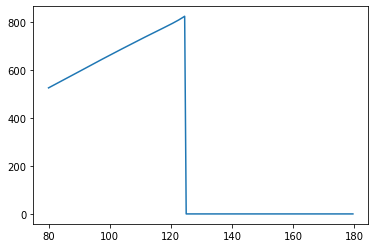

In [18]:
plt.plot(Data_fuel[0], Data_fuel[15])

In [19]:
fuel_columns = ['x', '1000 м', '2000 м','3000 м','4000 м','5000 м','6000 м',
                '7000 м','8100 м', '8600 м','9100 м', '9600 м', '10100 м',
                 '10600 м', '11100 м', '11600 м', '12100 м']


data_fuel = pd.DataFrame(Data_fuel.T, columns=fuel_columns)

data_fuel = data_fuel.replace(0, np.nan)

In [20]:
data_fuel['type'] = 'Топливо, кг'

In [21]:
fuel_columns.append('type')

In [22]:
fuel_columns[1:-1]

['1000 м',
 '2000 м',
 '3000 м',
 '4000 м',
 '5000 м',
 '6000 м',
 '7000 м',
 '8100 м',
 '8600 м',
 '9100 м',
 '9600 м',
 '10100 м',
 '10600 м',
 '11100 м',
 '11600 м',
 '12100 м']

In [23]:
# df = data_fuel[data_fuel['Тип'] == 'Топливо']
fig = px.line(data_fuel, x='x', y=fuel_columns[1:-1])
fig.show()

In [24]:
def Time1000(x):
    return 159.595-7.7719*x+0.154555*x**2-0.00160065*x**3+9.13503*10**(-6)*x**4-2.73005*10**(-8)*x**5+3.34465*10**(-11)*x**6

def Time2000(x):
    return 161.596-7.79268*x+0.154454*x**2-0.00159881*x**3+9.15953*10**(-6)*x**4-2.7589*10**(-8)*x**5+3.41692*10**(-11)*x**6

def Time3000(x):
    return -467.357+23.1065*x-0.466647*x**2+0.00495035*x**3-0.0000290573*x**4+8.95156*10**(-8)*x**5-1.13175*10**(-10)*x**6

def Time4000(x):
    return -393.488+19.143*x-0.38137*x**2+0.00401054*x**3-0.0000234108*x**4+7.18733*10**(-8)*x**5-9.06764*10**(-11)*x**6

def Time5000(x):
    return -396.235+19.4084*x-0.387114*x**2+0.00406219*x**3-0.0000235952*x**4+7.19512*10**(-8)*x**5-9.00752*10**(-11)*x**6

def Time6000(x):
    return 594.299-36.2387*x+0.936008*x**2-0.0131915*x**3+0.000109742*x**4-5.39034*10**(-7)*x**5+1.44796*10**(-9)*x**6-1.64195*10**(-12)*x**7

def Time7000(x):
    return 583.398-35.694*x+0.925739*x**2-0.0131002*x**3+0.000109472*x**4-5.40381*10**(-7)*x**5+1.4594*10**(-9)*x**6-1.66429*10**(-12)*x**7

def Time8100(x):
    return 3.60636-0.057839*x+0.0020898*x**2-0.000013*x**3+2.61696*10**(-8)*x**4

def Time8600(x):
    return 10.8978-0.28116*x+0.00467894*x**2-0.000025521*x**3+4.77517*10**(-8)*x**4

def Time9100(x):
    return -0.946494+0.133324*x-0.000394385*x**2+1.11588*10**-6*x**3-2.7606*10**(-9)*x**4

def Time9600(x):
    return -78.8745+3.47491*x-0.0557784*x**2+0.000441152*x**3-1.59986*10**(-6)*x**4+1.49011*10**(-9)*x**5+2.96747*10**(-12)*x**6

def Time10100(x):
    return 12.5575-0.313575*x+0.00530269*x**2-0.000029548*x**3+5.69307*10**(-8)*x**4

def Time10600(x):
    return -8.82133+0.36302*x-0.0021818*x**2+5.39668*10**(-6)*x**3

def Time11100(x):
    return -13.651+0.499522*x-0.00327333*x**2+8.23586*10**(-6)*x**3

def Time11600(x):
    return -8.08656+0.353797*x-0.00176257*x**2+2.97231*10**(-6)*x**3

def Time12100(x):
    return -5.73832+0.319395*x-0.0014677*x**2+2.07904*10**(-6)*x**3

In [25]:
replace_function('-78.8745+3.47491 x-0.0557784 x^2+0.000441152 x^3-1.59986*10^-6 x^4+1.49011*10^-9 x^5+2.96747*10^-12 x^6')

'-78.8745+3.47491*x-0.0557784*x**2+0.000441152*x**3-1.59986*10**-6*x**4+1.49011*10**-9*x**5+2.96747*10**-12*x**6'

In [26]:
Data_time = np.zeros((17, 200))
for i in range(0, 200, 1):
    x = 80 + i/2
    Data_time[0][i] = x
    Data_time[1][i] = Time1000(x)
    Data_time[2][i] = Time2000(x)
    Data_time[3][i] = Time3000(x)
    Data_time[4][i] = Time4000(x)
    Data_time[5][i] = Time5000(x)
    Data_time[6][i] = Time6000(x)
    Data_time[7][i] = Time7000(x)
    Data_time[8][i] = Time8100(x)
    Data_time[9][i] = Time8600(x)
    Data_time[10][i] = Time9100(x)
    
    if x < 165.0:
        Data_time[11][i] = Time9600(x)
        Data_time[12][i] = Time10100(x)
        
    if x < 145.0:
        Data_time[13][i] = Time10600(x)
        Data_time[14][i] = Time11100(x)  
        
    if x < 125.0:
        Data_time[15][i] = Time11600(x)
        Data_time[16][i] = Time12100(x)

In [27]:
data_time = pd.DataFrame(Data_time.T, columns=fuel_columns[:-1])

data_time = data_time.replace(0, np.nan)

In [28]:
data_time

,x,1000 м,2000 м,3000 м,4000 м,5000 м,6000 м,7000 м,8100 м,8600 м,9100 м,9600 м,10100 м,10600 м,11100 м,11600 м,12100 м
0,80.0,0.942550,1.824444,2.670963,3.418267,4.446307,5.471748,6.228122,6.769867,7.239374,7.653618,8.136795,8.612021,9.019850,9.578208,10.458575,11.484468
1,80.5,0.942730,1.826531,2.713613,3.475772,4.497979,5.501114,6.262316,6.810122,7.277101,7.696557,8.190075,8.654183,9.078403,9.644844,10.522740,11.546467
2,81.0,0.943828,1.829658,2.753636,3.530650,4.547195,5.530872,6.296839,6.850361,7.315014,7.739380,8.242454,8.696535,9.136517,9.710838,10.586383,11.607982
3,81.5,0.945784,1.833765,2.791191,3.583035,4.594094,5.560956,6.331629,6.890581,7.353105,7.782086,8.293971,8.739069,9.194196,9.776195,10.649505,11.669017
4,82.0,0.948543,1.838796,2.826429,3.633058,4.638809,5.591304,6.366626,6.930778,7.391368,7.824677,8.344665,8.781777,9.251443,9.840923,10.712110,11.729571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,177.5,1.782248,3.292402,4.983935,6.457934,8.177134,9.808251,11.054540,12.458118,13.085578,13.793033,NaN,NaN,NaN,NaN,NaN,NaN
196,178.0,1.786986,3.295904,4.979792,6.459619,8.181599,9.806681,11.056299,12.478495,13.103523,13.811470,NaN,NaN,NaN,NaN,NaN,NaN
197,178.5,1.791912,3.299669,4.974242,6.460219,8.185093,9.803183,11.055940,12.498933,13.121532,13.829746,NaN,NaN,NaN,NaN,NaN,NaN
198,179.0,1.797046,3.303724,4.967174,6.459647,8.187539,9.797592,11.053285,12.519437,13.139611,13.847859,NaN,NaN,NaN,NaN,NaN,NaN


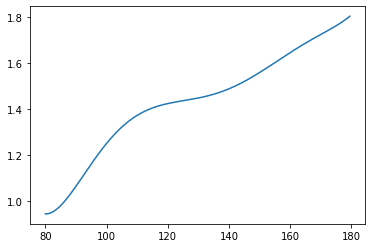

In [29]:
plt.plot(Data_time[0], Data_time[1])

In [30]:
Data_time[1][199]

1.802409522080552

In [31]:
data_time['type'] = 'Время, мин'

In [32]:
data_time

,x,1000 м,2000 м,3000 м,4000 м,5000 м,6000 м,7000 м,8100 м,8600 м,9100 м,9600 м,10100 м,10600 м,11100 м,11600 м,12100 м,type
0,80.0,0.942550,1.824444,2.670963,3.418267,4.446307,5.471748,6.228122,6.769867,7.239374,7.653618,8.136795,8.612021,9.019850,9.578208,10.458575,11.484468,"Время, мин"
1,80.5,0.942730,1.826531,2.713613,3.475772,4.497979,5.501114,6.262316,6.810122,7.277101,7.696557,8.190075,8.654183,9.078403,9.644844,10.522740,11.546467,"Время, мин"
2,81.0,0.943828,1.829658,2.753636,3.530650,4.547195,5.530872,6.296839,6.850361,7.315014,7.739380,8.242454,8.696535,9.136517,9.710838,10.586383,11.607982,"Время, мин"
3,81.5,0.945784,1.833765,2.791191,3.583035,4.594094,5.560956,6.331629,6.890581,7.353105,7.782086,8.293971,8.739069,9.194196,9.776195,10.649505,11.669017,"Время, мин"
4,82.0,0.948543,1.838796,2.826429,3.633058,4.638809,5.591304,6.366626,6.930778,7.391368,7.824677,8.344665,8.781777,9.251443,9.840923,10.712110,11.729571,"Время, мин"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,177.5,1.782248,3.292402,4.983935,6.457934,8.177134,9.808251,11.054540,12.458118,13.085578,13.793033,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"
196,178.0,1.786986,3.295904,4.979792,6.459619,8.181599,9.806681,11.056299,12.478495,13.103523,13.811470,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"
197,178.5,1.791912,3.299669,4.974242,6.460219,8.185093,9.803183,11.055940,12.498933,13.121532,13.829746,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"
198,179.0,1.797046,3.303724,4.967174,6.459647,8.187539,9.797592,11.053285,12.519437,13.139611,13.847859,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"


In [33]:
all_data = data_fuel.append(data_time, sort=False)

/var/folders/js/m36dwvv14z9g_jhgvqvd4d5c0000gn/T/ipykernel_76711/676219576.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
all_data

,x,1000 м,2000 м,3000 м,4000 м,5000 м,6000 м,7000 м,8100 м,8600 м,9100 м,9600 м,10100 м,10600 м,11100 м,11600 м,12100 м,type
0,80.0,49.765430,88.899364,128.652676,172.473513,207.003387,246.520024,286.971010,314.768099,341.699785,355.059768,371.253636,390.279081,418.813130,455.251681,525.066035,546.213978,"Топливо, кг"
1,80.5,49.880054,89.437487,130.133038,174.114899,209.028716,248.728628,288.447615,316.851095,343.546926,357.223160,373.344539,393.364521,421.583656,457.385149,528.439149,549.101360,"Топливо, кг"
2,81.0,49.995091,89.992534,131.503592,175.671261,210.964679,250.845959,289.933227,318.872447,345.316574,359.387546,375.425037,396.384454,424.289991,459.565477,531.800212,551.871775,"Топливо, кг"
3,81.5,50.110441,90.562090,132.773211,177.148322,212.817014,252.877638,291.426588,320.837190,347.016619,361.550536,377.495879,399.340677,426.938939,461.784811,535.154511,554.545953,"Топливо, кг"
4,82.0,50.226032,91.143892,133.950297,178.551533,214.591196,254.829049,292.926518,322.750076,348.654479,363.709903,379.557717,402.234963,429.536686,464.035897,538.506396,557.141749,"Топливо, кг"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,177.5,1.782248,3.292402,4.983935,6.457934,8.177134,9.808251,11.054540,12.458118,13.085578,13.793033,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"
196,178.0,1.786986,3.295904,4.979792,6.459619,8.181599,9.806681,11.056299,12.478495,13.103523,13.811470,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"
197,178.5,1.791912,3.299669,4.974242,6.460219,8.185093,9.803183,11.055940,12.498933,13.121532,13.829746,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"
198,179.0,1.797046,3.303724,4.967174,6.459647,8.187539,9.797592,11.053285,12.519437,13.139611,13.847859,NaN,NaN,NaN,NaN,NaN,NaN,"Время, мин"


In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[1][:], name='H = 1000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[2][:], name='H = 2000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[3][:], name='H = 3000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[4][:], name='H = 4000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[5][:], name='H = 5000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[6][:], name='H = 6000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[7][:], name='H = 7000 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[8][:], name='H = 8100 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[9][:], name='H = 8600 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[10][:], name='H = 9100 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[11][:], name='H = 9600 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[12][:], name='H = 10100 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[13][:], name='H = 10600 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[14][:], name='H = 11100 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[15][:], name='H = 11600 km'))
fig.add_trace(go.Scatter(x=Data_time[0][:], y=Data_time[16][:], name='H = 12100 km'))


fig.update_layout(xaxis_title="Вес, M",
                  yaxis_title="Расход топлива, кг")
fig.update_traces(hoverinfo="all", hovertemplate="Масса: %{x} кг<br>Расход: %{y} кг")
fig.show()

In [36]:
# app = Dash(__name__)

# app.layout = html.Div([
#     html.H1("ИЛ-78. Руководство по летной эксплуатации"),
#     html.Div(children=[
#         html.Label('Выбор графика'),
#         dcc.Dropdown(
#             ['1000 km', '2000 km'],
#             '1000 km',
#             id ='differ_height'),
#         html.Br(),
#     ], style={'padding': 10, 'flex': 1}),
#     dcc.Graph(id='graph_heights')
# ])

# @app.callback(
#     Output('graph_heights', 'figure'),
#     Input('differ_height', 'value'))

# def update_figure(selected_height):
#     filtered_df = new_data[selected_height]
#     fig = px.line(x = filtered_df.index, y = filtered_df.values, 
#                   labels={'x': 'Вес, M', 'y' : 'Расход топлива, кг'})
#     fig.update_layout(transition_duration=500)
    
#     return fig

# if __name__ == "__main__":
#     app.run_server(debug=True, use_reloader=False)

In [43]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("ИЛ-78. Руководство по летной эксплуатации"),
    html.Div(children=[
        html.Label('Выбор зависимости:'),
        dcc.Dropdown(
            ['Топливо, кг', 'Время, мин', 'Путь, км'],
            'Топливо, кг',
            id ='differ_dep'),
        html.Br(),
        dcc.RadioItems(['ИЛ-78', 'МИ-24'])
    ], style={'padding': 10, 'flex': 1}),
    dcc.Graph(id='graph_heights')
])

@app.callback(
    Output('graph_heights', 'figure'),
    Input('differ_dep', 'value'))

def update_figure(selected_type):
    filtered_df = all_data[all_data.type == selected_type]

    fig = px.line(filtered_df, x='x', y=fuel_columns[1:-1],
                  title=f'Зависимость: {selected_type} (Вес, кг) для различных высот')
                    
    fig.update_layout(transition_duration=500, xaxis_title="Вес M, кг", yaxis_title=f"{selected_type}")
    fig.update_traces(hoverinfo="all", hovertemplate="Масса, кг: %{x} <br> Параметр: %{y}")
    
    return fig

if __name__ == "__main__":
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [38]:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
d = pd.DataFrame(data=d, index=[0, 1, 2, 3])

<AxesSubplot:>

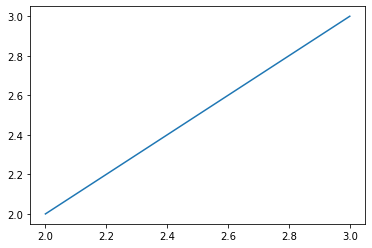

In [107]:
d['col2'].plot()